# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load datasets

train = pd.read_csv(r'H:\py\datasets\kaggle\house pred\train.csv')
test = pd.read_csv(r'H:\py\datasets\kaggle\house pred\test.csv')

In [3]:
# head and info

print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
#Check null entries

print(train.isnull().sum().div(len(train)).mul(100).sort_values(ascending=False).head(10))
print(test.isnull().sum().div(len(test)).mul(100).sort_values(ascending=False).head(10))

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
dtype: float64
PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageQual       5.346127
GarageYrBlt      5.346127
GarageFinish     5.346127
dtype: float64


In [5]:
#drop features with more than 50% null entries

train = train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)
test = test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)

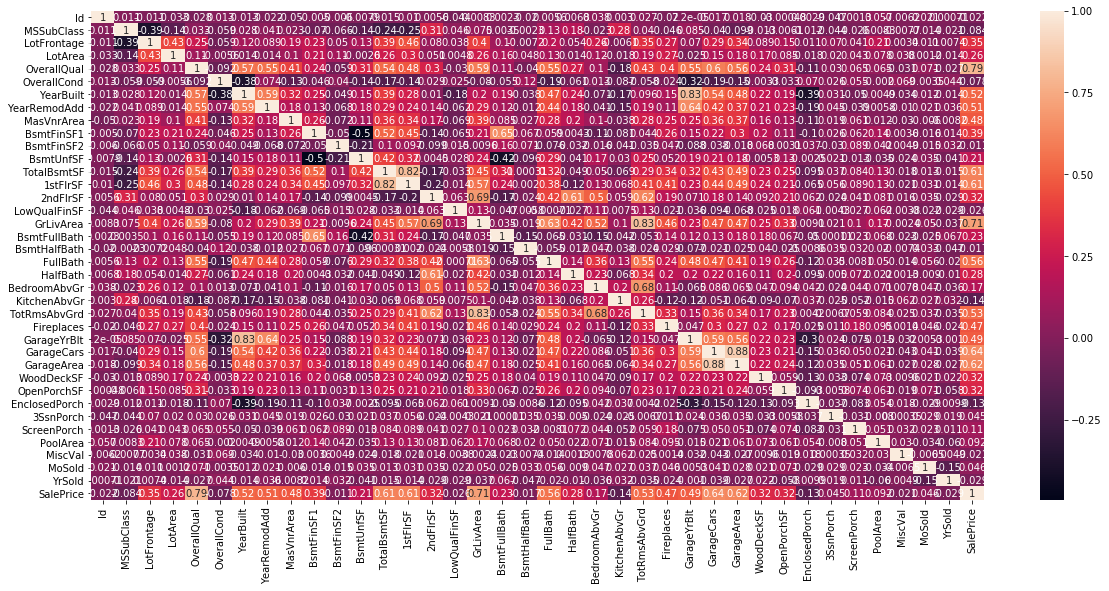

In [6]:
#Correlation matrix

cor = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(cor, annot=True, ax=ax)
plt.show()

In [7]:
#top correlated features

top_features = cor[cor['SalePrice'] > 0.4].index.values
print(top_features)

['OverallQual' 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'TotalBsmtSF'
 '1stFlrSF' 'GrLivArea' 'FullBath' 'TotRmsAbvGrd' 'Fireplaces'
 'GarageYrBlt' 'GarageCars' 'GarageArea' 'SalePrice']


In [8]:
#new data

train = train[top_features]
test = test[top_features[:len(top_features)-1]]


In [9]:
#impute data

train['MasVnrArea'].fillna(train['MasVnrArea'].median(), inplace=True)
train['MasVnrArea'] = train['MasVnrArea'].astype('int64')
test['MasVnrArea'].fillna(test['MasVnrArea'].median(), inplace=True)
test['MasVnrArea'] = test['MasVnrArea'].astype('int64')

train['GarageYrBlt'].fillna(train['GarageYrBlt'].median(), inplace=True)
train['GarageYrBlt'] = train['GarageYrBlt'].astype('int64')
test['GarageYrBlt'].fillna(test['GarageYrBlt'].median(), inplace=True)
test['GarageYrBlt'] = test['GarageYrBlt'].astype('int64')

In [10]:
#check fo no of unique values and separate cat and numeric values

print(train.nunique())
cat = train.nunique()[train.nunique() <= 12].index.values
num = [i for i in train.columns if i not in cat]
for i in cat:
    train[i] = train[i].astype('category')
    
for i in cat:
    test[i] = test[i].astype('category')    
    

OverallQual      10
YearBuilt       112
YearRemodAdd     61
MasVnrArea      327
TotalBsmtSF     721
1stFlrSF        753
GrLivArea       861
FullBath          4
TotRmsAbvGrd     12
Fireplaces        4
GarageYrBlt      97
GarageCars        5
GarageArea      441
SalePrice       663
dtype: int64


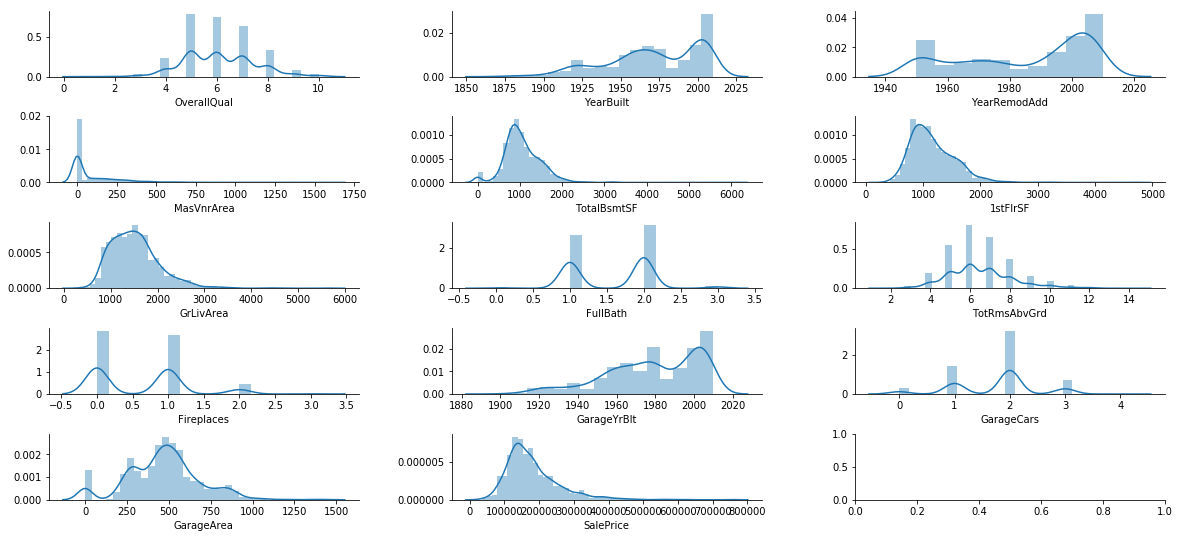

In [23]:
#Univariate Analysis

fig, ax = plt.subplots(figsize=(20,9), nrows=5, ncols=3)
plt.subplots_adjust(hspace=0.6, wspace=0.3)

for i, ax in enumerate(ax.flatten()):
    if i< 14:
        sns.distplot(train[train.columns[i]], ax=ax,)
        sns.despine()
plt.show()    


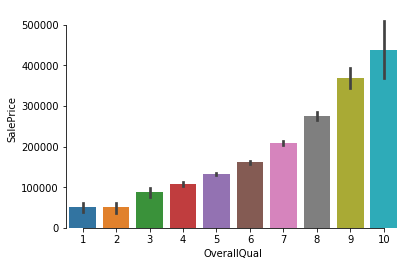

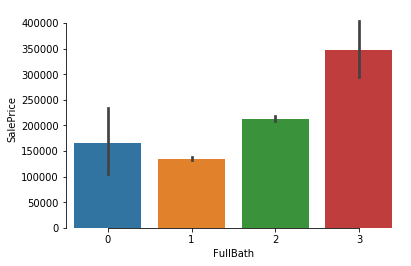

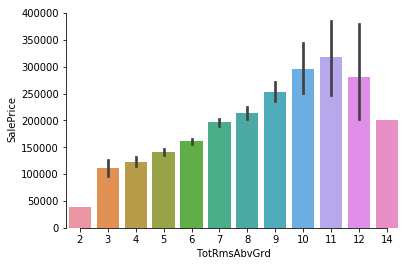

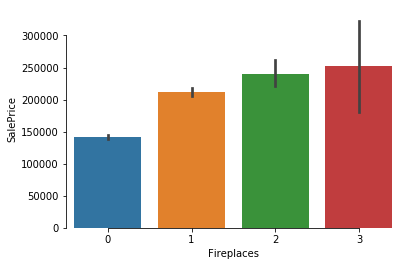

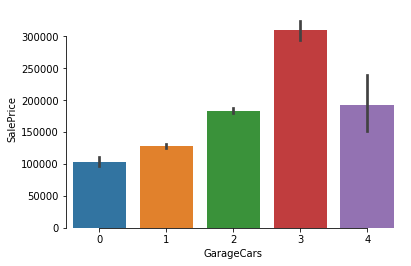

In [12]:
#Bivariate analysis

for i in cat:
    sns.barplot(x=i, y='SalePrice', data=train)
    sns.despine(trim=True)
    plt.show()
    

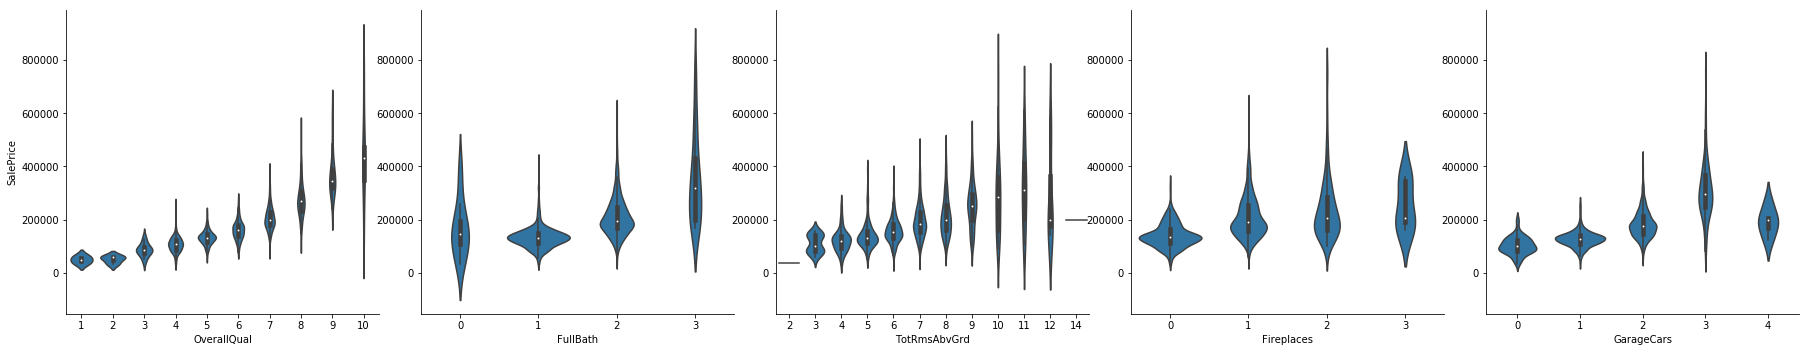

In [21]:
#bivariate continued

g = sns.PairGrid(train, x_vars=cat, y_vars='SalePrice',  size=5, aspect=1)
g.map(sns.violinplot,)
plt.show()

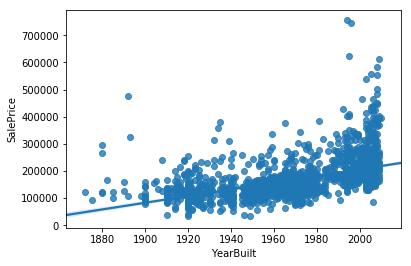

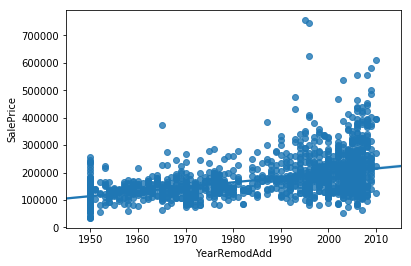

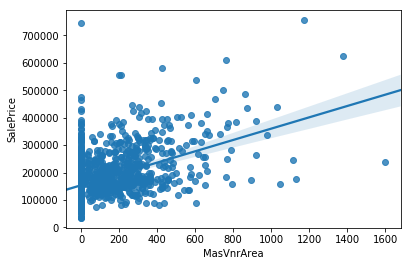

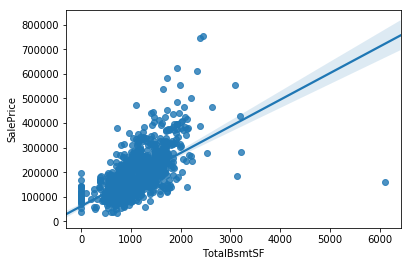

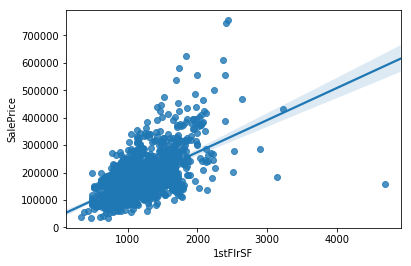

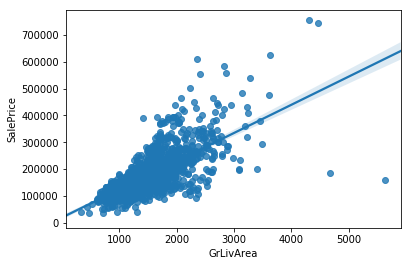

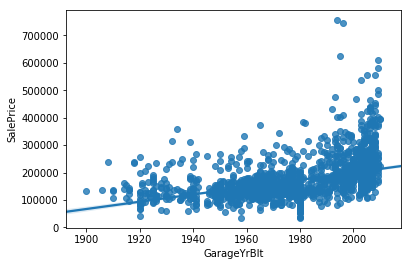

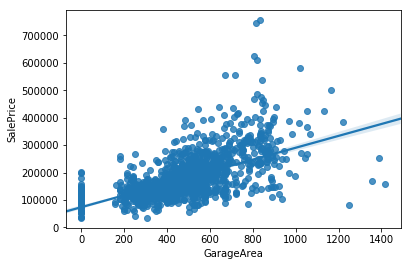

In [22]:
#Bivariate for numeric

for i in num:
    if i != 'SalePrice':
        sns.regplot(i, 'SalePrice', data=train, robust=True)
        plt.show()


In [114]:
#feature selection using Lasso

from sklearn.linear_model import LassoCV

lcv = LassoCV(cv=10, n_jobs=-1)
lcv.fit(train.loc[:,:'GarageArea'], train['SalePrice'])
print(lcv.coef_)

[   0.          422.02530507  524.08179811   43.05720579   33.6837058
    4.61677693   64.80402014   -0.           -0.            0.            0.
    0.           57.71735622]


In [109]:
train.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')